                REVIEW OF LIVER PATIENT ANALYSIS

DATA COLLECTION AND PREPARATION

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
#Read the Dataset
data = pd.read_csv('/content/indian_liver_patient.csv')

In [3]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


DATA PREPARATION
       Here we have understood hoe the data is, let pre-process for collected data

In [4]:
#Handling Missing Values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
data.isnull().any()

Age                           False
Gender                        False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio     True
Dataset                       False
dtype: bool

In [6]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [7]:
data['Albumin_and_Globulin_Ratio'] = data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].mode()[0])
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [8]:
#Handling Categorical Values
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
data['Gender']=lc.fit_transform(data['Gender'])

EXPLORATORY DATA ANALYSIS

In [9]:
#Descriptive Statistical
data.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,0.756432,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947427,1.286449
std,16.189833,0.429603,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318522,0.452490
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


VISUAL ANALYSIS
           It is a process of using visual representation,such as charts,plots,etc.,

<ipython-input-10-41c22b0a06dd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


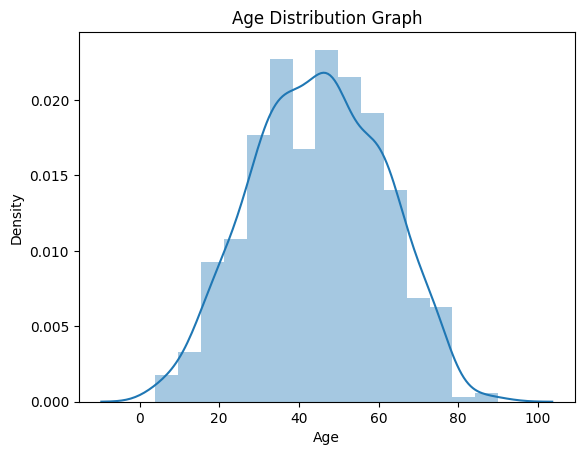

In [10]:
#univariate Analysis
sns.distplot(data['Age'])
plt.title('Age Distribution Graph')
plt.show()

<Axes: xlabel='Dataset', ylabel='count'>

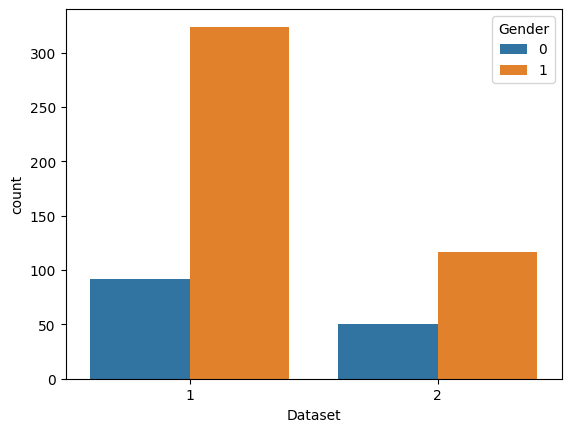

In [11]:
#Bivariate Analysis
sns.countplot(data,x='Dataset', hue=data['Gender'])

<Axes: >

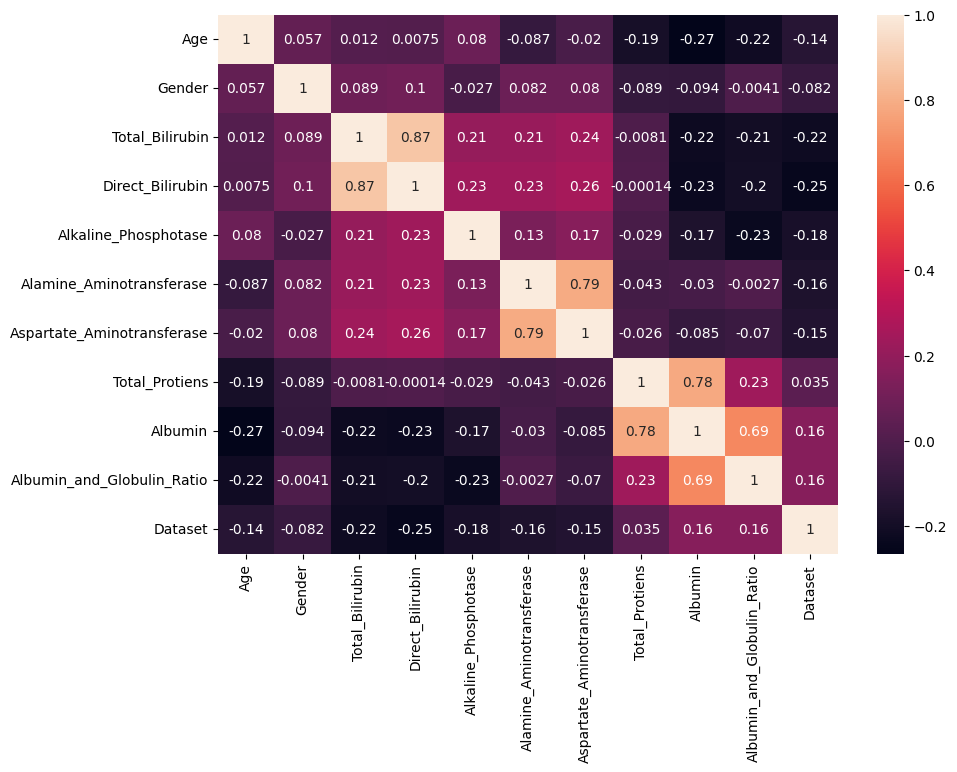

In [12]:
#Multivariate Analysis
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
x_scaled = pd.DataFrame (scale(x), columns=x.columns)

In [19]:
x=data.iloc[:,:-1]
y=data.Dataset

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=10)

In [57]:
#Handling Imbalance Data

In [26]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [29]:
y_train.value_counts()

1    333
2    133
Name: Dataset, dtype: int64

In [30]:
x_train_smote,y_train_smote = smote.fit_resample(x_train,y_train)

In [31]:
y_train_smote.value_counts()

2    333
1    333
Name: Dataset, dtype: int64

MODEL BUILDING

TRAINING THE MODEL IN MUTIPLE ALGORITHMS
                In this Model building we can train our data on different algorithms.

In [32]:
#Random Forest Model
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier()
model1.fit(x_train_smote,y_train_smote)
y_predict = model1.predict(x_test)
rfc1 = accuracy_score(y_test,y_predict)
rfc1
pd.crosstab(y_test, y_predict)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.74      0.69      0.71        83
           2       0.35      0.41      0.38        34

    accuracy                           0.61       117
   macro avg       0.55      0.55      0.55       117
weighted avg       0.63      0.61      0.62       117



In [33]:
#Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier()
model4.fit(x_train_smote,y_train_smote)
y_predict = model4.predict(x_test)
dtc1 = accuracy_score(y_test,y_predict)
dtc1
pd.crosstab(y_test,y_predict)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       0.81      0.76      0.78        83
           2       0.49      0.56      0.52        34

    accuracy                           0.70       117
   macro avg       0.65      0.66      0.65       117
weighted avg       0.71      0.70      0.71       117



In [34]:
#KNN Model
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier()
model2.fit(x_train_smote,y_train_smote)
y_predict = model2.predict(x_test)
knn1 = accuracy_score(y_test,y_predict)
knn1
pd.crosstab(y_test,y_predict)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       0.73      0.49      0.59        83
           2       0.31      0.56      0.40        34

    accuracy                           0.51       117
   macro avg       0.52      0.53      0.49       117
weighted avg       0.61      0.51      0.53       117



In [35]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression
model5 = LogisticRegression()
model5.fit(x_train_smote,y_train_smote)
y_predict = model5.predict(x_test)
logi1 = accuracy_score(y_test,y_predict)
logi1
pd.crosstab(y_test,y_predict)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       0.84      0.65      0.73        83
           2       0.45      0.71      0.55        34

    accuracy                           0.67       117
   macro avg       0.65      0.68      0.64       117
weighted avg       0.73      0.67      0.68       117



In [36]:
#ANN Model
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [37]:
# Initialising the ANW
classifier = Sequential()

In [38]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=100, activation='relu',input_dim=10))

In [39]:
# Adding the second hidden layer
classifier.add(Dense(units=50, activation='relu'))

In [40]:
# Adding the output layer
classifier.add(Dense(units=1, activation='sigmoid'))

In [41]:
#Compilling the ANN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [42]:
# Fitting the ANN to the Training set
model_history = classifier.fit(x_train,y_train,batch_size=100,validation_split=0.2,epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 91ms/step - loss: 0.4918 - accuracy: 0.6667 - val_loss: 0.3447 - val_accuracy: 0.6915
Epoch 2/100
4/4 [==============================] - 0s 23ms/step - loss: 0.2802 - accuracy: 0.7204 - val_loss: 0.1408 - val_accuracy: 0.6915
Epoch 3/100
4/4 [==============================] - 0s 22ms/step - loss: 0.0939 - accuracy: 0.7204 - val_loss: -0.0437 - val_accuracy: 0.6915
Epoch 4/100
4/4 [==============================] - 0s 24ms/step - loss: -0.0760 - accuracy: 0.7204 - val_loss: -0.2187 - val_accuracy: 0.6915
Epoch 5/100
4/4 [==============================] - 0s 25ms/step - loss: -0.2404 - accuracy: 0.7204 - val_loss: -0.3928 - val_accuracy: 0.6915
Epoch 6/100
4/4 [==============================] - 0s 24ms/step - loss: -0.4039 - accuracy: 0.7204 - val_loss: -0.5702 - val_accuracy: 0.6915
Epoch 7/100
4/4 [==============================] - 0s 30ms/step - loss: -0.5659 - accuracy: 0.7204 - val_loss: -0.7568 - val_accuracy: 0.6915
Epoch 8/100

TESTING THE MODEL

In [43]:
#Age->Gender->Total_Bilrubin->Direct_Bilrubin*Alkaline_phosphotase->Alanin_aminotransferase->Asparate_aminotransferase
model4.predict([[50,1,1.2,0.8,150,70,80,7.2,3.4,0.8]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [44]:
#Age->Gender->Total_Bilrubin->Direct_Bilrubin*Alkaline_phosphotase->Alanin_aminotransferase->Asparate_aminotransferase
model1.predict([[50,1,1.2,0.8,150,70,80,7.2,3.4,0.8]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

In [45]:
#Age->Gender->Total_Bilrubin->Direct_Bilrubin*Alkaline_phosphotase->Alanin_aminotransferase->Asparate_aminotransferase
model2.predict([[50,1,1.2,0.8,150,70,80,7.2,3.4,0.8]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

In [46]:
#Age->Gender->Total_Bilrubin->Direct_Bilrubin*Alkaline_phosphotase->Alanin_aminotransferase->Asparate_aminotransferase
model5.predict([[42,0,1.2,0.8,240,70,80,7.2,3.4,0.8]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [47]:
y_predict = (y_predict > 0.5)
y_predict

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [48]:
def predict_exit(sample_value):
  #convert list to numpy array
  sample_value = np.array(sample_value)
  #Reshape because sample_valuecontains only 1 record
  sample_value = sample_value.reshape(1,-1)
  #feature scaling
  sample_value = scale(sample_value)
  return classifier.predict(sample_value)

In [49]:
#Age->Gender->Total_Bilrubin->Direct_Bilrubin*Alkaline_phosphotase->Alanin_aminotransferase->Asparate_aminotransferase
sample_value = [[50,1,1.2,0.8,150,70,80,7.2,3.4,0.8]]
if predict_exit(sample_value) > 0.5:
  print('prediction: Liver Patient')
else:
  print('Prediction: healthy')

1/1 [==============================] - 0s 87ms/step
prediction: Liver Patient


PERFORMANCE TESTING AND HYPERPARAMETER TUNING

TESTING MODEL WITH MULTIPLE EVALUTION METRICS
             It can provide a more comprehensive understanding of the model's strengths and weakness

In [50]:
#Compare The Model
acc_smote = [['KNN Classifier',knn1],['RandomForestClassifier',rfc1],['DecisionTreeClassifier',dtc1],['LogisticRegression',logi1]]
Liverpatient_pred = pd.DataFrame(acc_smote,columns = ['classification models','accuracy_score'])
Liverpatient_pred

,classification models,accuracy_score
0,KNN Classifier,0.512821
1,RandomForestClassifier,0.606838
2,DecisionTreeClassifier,0.700855
3,LogisticRegression,0.666667


<Axes: title={'center': 'classification models and accuracy scores after SMOTE'}, xlabel='classification models', ylabel='accuracy_score'>

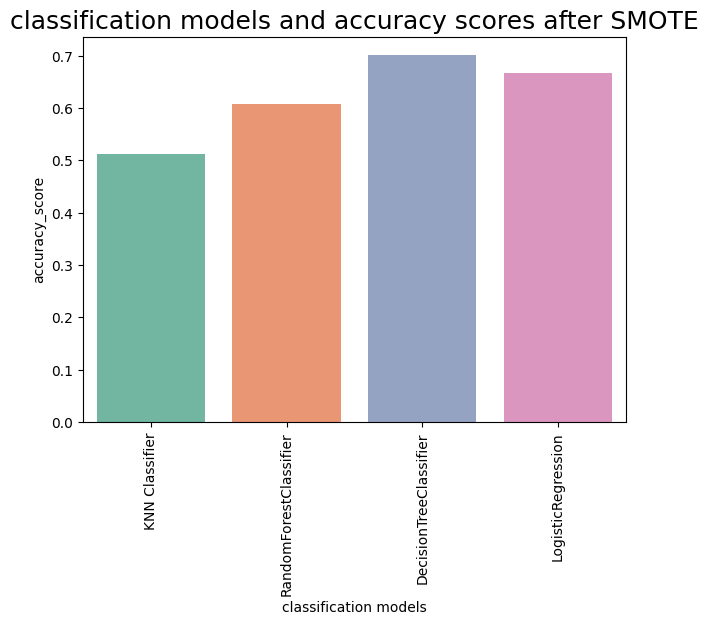

In [51]:
plt.figure(figsize = (7,5))
plt.xticks(rotation=90)
plt.title('classification models and accuracy scores after SMOTE',fontsize = 18)
sns.barplot(x = "classification models",y = "accuracy_score",data = Liverpatient_pred,palette = "Set2")

In [52]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [53]:
model.feature_importances_

array([0.11997537, 0.0246835 , 0.11302646, 0.10781847, 0.11793029,
       0.11362811, 0.11458766, 0.09351796, 0.09571033, 0.09912186])

In [54]:
dd = pd.DataFrame(model.feature_importances_,index = x.columns).sort_values(0,ascending = False)
dd

,0
Age,0.119975
Alkaline_Phosphotase,0.117930
Aspartate_Aminotransferase,0.114588
Alamine_Aminotransferase,0.113628
Total_Bilirubin,0.113026
Direct_Bilirubin,0.107818
Albumin_and_Globulin_Ratio,0.099122
Albumin,0.095710
Total_Protiens,0.093518
Gender,0.024683


Text(0.5, 1.0, 'FEATURE IMPORTANCE')

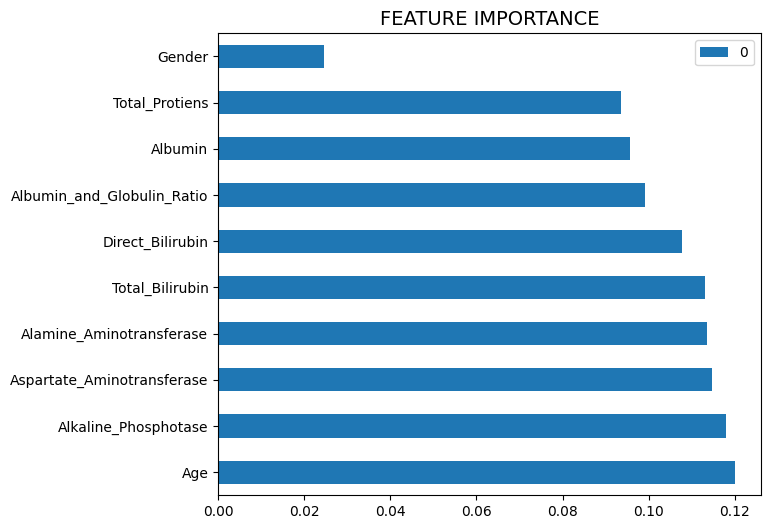

In [55]:
#Identifying Important Features
dd.plot(kind = 'barh',figsize = (7,6))
plt.title("FEATURE IMPORTANCE",fontsize = 14)

In [56]:
#Save The Best Model
import joblib
joblib.dump(model4, 'ETC.pk1')

['ETC.pk1']